In [1]:
! git clone 'https://github.com/DS3001/project_chd'

Cloning into 'project_chd'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 13 (delta 2), reused 2 (delta 1), pack-reused 9
Receiving objects: 100% (13/13), 638.41 KiB | 4.01 MiB/s, done.
Resolving deltas: 100% (4/4), done.


- `sex` : the recorded sex of the observationsm with 1 denoting an participant coded as male
- `age` : Age at the time of medical examination in years.
- `education`: A categorical variable of the participants education, with the levels: Some high school (1), high school/GED (2), some college/vocational school (3), college (4)
- `currentSmoker`: Current cigarette smoking at the time of examinations
- `cigsPerDay`: Number of cigarettes smoked each day
- `BPmeds`: Use of Anti-hypertensive medication at exam
- `prevalentStroke`: Prevalent Stroke (0 = free of disease)
- `prevalentHyp`: Prevalent Hypertensive. Subject was defined as hypertensive if treated
- `diabetes`: Diabetic according to criteria of first exam treated
- `totChol`: Total cholesterol (mg/dL)
- `sysBP`: Systolic Blood Pressure (mmHg)
- `diaBP`: Diastolic blood pressure (mmHg)
- `BMI`: Body Mass Index, weight (kg)/height (m)^2
- `heartRate`: Heart rate (beats/minute)
- `glucose`: Blood glucose level (mg/dL)
- `TenYearCHD` : The 10 year risk of coronary heart disease(CHD)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df_train = pd.read_csv('/content/project_chd/fhs_train.csv')

In [4]:
df_test = pd.read_csv('/content/project_chd/fhs_test.csv')

In [5]:
df_train.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


<Axes: >

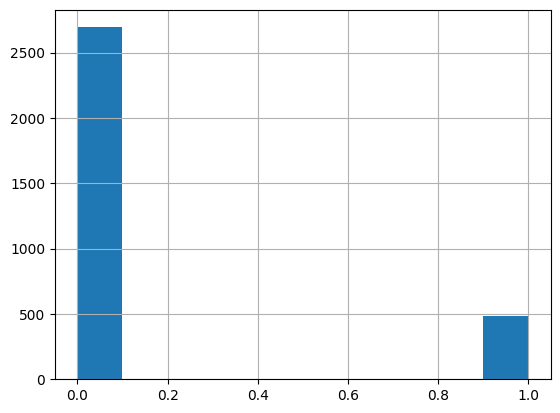

In [ ]:
df_train["TenYearCHD"].hist()

In [ ]:
df_train.corr()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Unnamed: 0,1.000000,0.028560,0.003256,0.003224,0.013659,0.005077,0.011981,0.020691,0.017232,0.047541,-0.002499,-0.001416,-0.003690,0.001806,0.042063,0.032639,-0.019496
sex,0.028560,1.000000,-0.038939,0.006745,0.198117,0.327893,-0.043688,0.007104,0.010722,0.020140,-0.071023,-0.027647,0.064950,0.083577,-0.109369,0.016639,0.097138
age,0.003256,-0.038939,1.000000,-0.176825,-0.216628,-0.201243,0.114807,0.064746,0.298794,0.094140,0.263317,0.396181,0.207611,0.138713,-0.016787,0.110138,0.225568
education,0.003224,0.006745,-0.176825,1.000000,0.014989,0.005721,-0.013907,-0.031525,-0.084230,-0.041414,-0.027894,-0.140590,-0.068479,-0.150210,-0.075420,-0.044037,-0.052668
currentSmoker,0.013659,0.198117,-0.216628,0.014989,1.000000,0.766473,-0.051624,-0.033461,-0.098607,-0.038440,-0.024813,-0.133829,-0.102881,-0.176686,0.064442,-0.060568,0.001644
cigsPerDay,0.005077,0.327893,-0.201243,0.005721,0.766473,1.000000,-0.047041,-0.030623,-0.067209,-0.034708,-0.015547,-0.091574,-0.050735,-0.095727,0.080058,-0.064437,0.047712
BPMeds,0.011981,-0.043688,0.114807,-0.013907,-0.051624,-0.047041,1.000000,0.127704,0.254690,0.053874,0.073698,0.252585,0.200810,0.091004,-0.005829,0.028597,0.088135
prevalentStroke,0.020691,0.007104,0.064746,-0.031525,-0.033461,-0.030623,0.127704,1.000000,0.068668,-0.013348,-0.009028,0.056260,0.038972,0.005215,-0.024421,0.005178,0.062357
prevalentHyp,0.017232,0.010722,0.298794,-0.084230,-0.098607,-0.067209,0.254690,0.068668,1.000000,0.081750,0.166555,0.690353,0.614522,0.300526,0.146410,0.086814,0.163910
diabetes,0.047541,0.020140,0.094140,-0.041414,-0.038440,-0.034708,0.053874,-0.013348,0.081750,1.000000,0.044650,0.104852,0.045949,0.086582,0.043512,0.612154,0.105644


In [ ]:
# looking at correlation to ten year risk of CHD: age, prevalent hyp, diabetes, sys BP, and glucose all seem to be positively correlated
# Ashley: 1st 3
# Anna: last 3

In [ ]:
# cleaning diabetes

<Axes: xlabel='diabetes', ylabel='Count'>

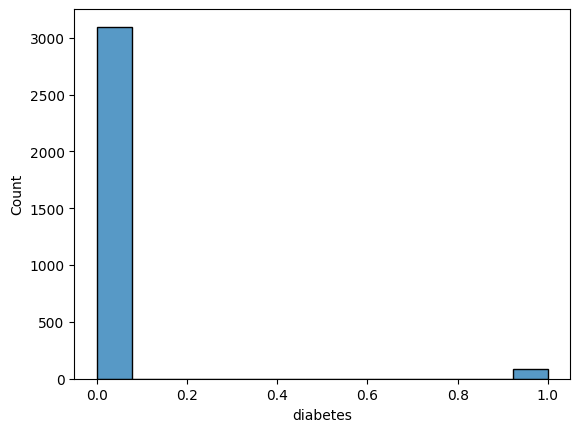

In [11]:
var = df_train["diabetes"]
sns.histplot(var)

#binary variable - either has diabetes or doesn't

In [12]:
var.value_counts()
#very few have diabetes

diabetes
0    3097
1      83
Name: count, dtype: int64

In [13]:
pd.crosstab(var,df_train["TenYearCHD"])


TenYearCHD,0,1
diabetes,,
0,2642,455
1,51,32


In [15]:
print("percent without diabetes with CHD risk: ",455/2642)
print("percent with diabetes with CHD risk: ",32/51)

percent without diabetes with CHD risk:  0.17221801665404995
percent with diabetes with CHD risk:  0.6274509803921569


In [ ]:
#obviously a huge difference between those with and without diabetes

In [ ]:
#cleaning sys BP

<Axes: xlabel='sysBP', ylabel='Count'>

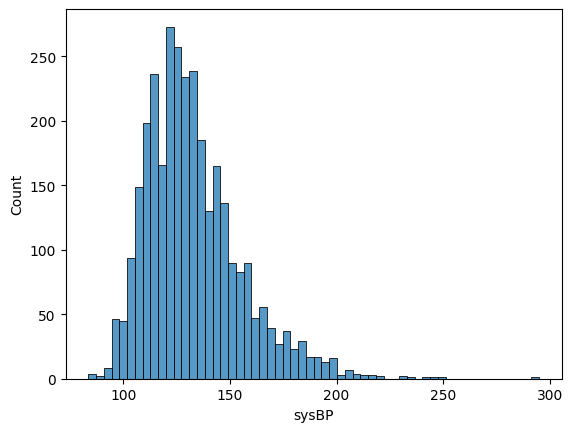

In [18]:
var = df_train["sysBP"]
sns.histplot(var)

<Axes: ylabel='sysBP'>

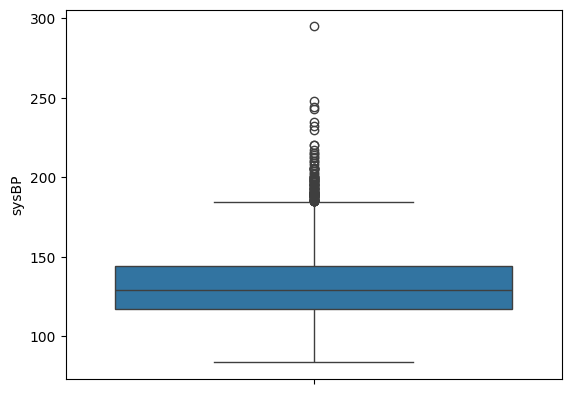

In [19]:
#lots of outliers
sns.boxplot(var)

In [21]:
#use arcsign to account for outliers
df_train['sysBP_arc'] = np.arcsinh(df_train['sysBP'])

<Axes: xlabel='sysBP', ylabel='Density'>

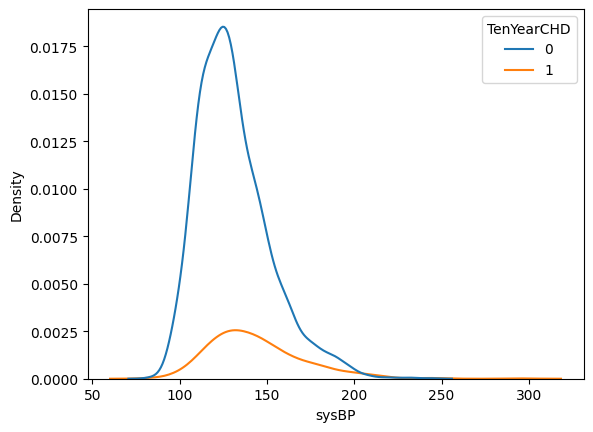

In [20]:
sns.kdeplot(x=df_train['sysBP'], hue=df_train['TenYearCHD'])

<Axes: xlabel='sysBP_arc', ylabel='Density'>

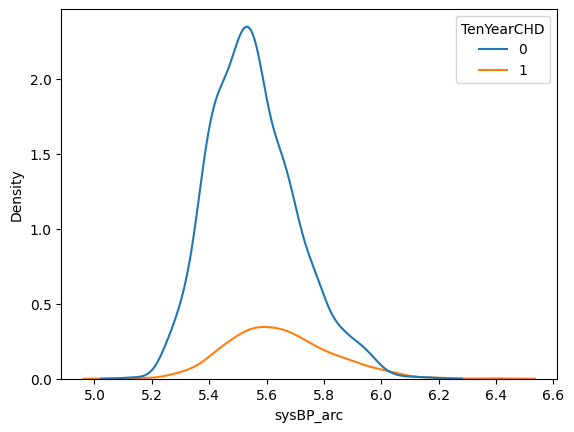

In [22]:
sns.kdeplot(x=df_train['sysBP_arc'], hue=df_train['TenYearCHD'])

<Axes: ylabel='sysBP_arc'>

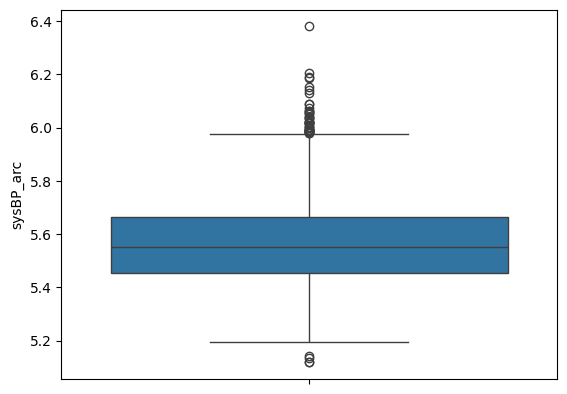

In [24]:
sns.boxplot(df_train['sysBP_arc'])

In [ ]:
#still have some outliers, but the data looks much better than before

In [ ]:
#clean glucose

<Axes: ylabel='glucose'>

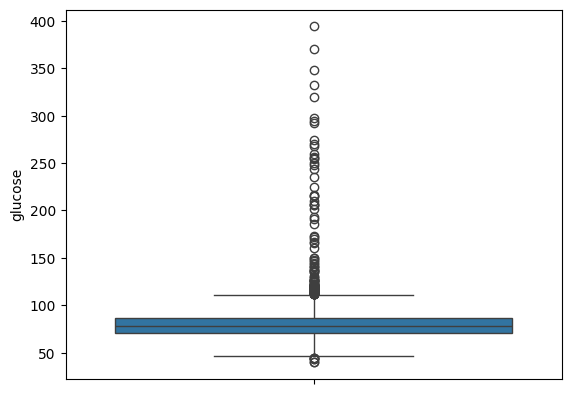

In [26]:
var = df_train['glucose']
sns.boxplot(var)
#this is looking rough

In [28]:
var.groupby(df_train["TenYearCHD"]).describe()
# trying to figure out where the outliers are coming from
# it seems like the values are pretty similar except for the max

,count,mean,std,min,25%,50%,75%,max
TenYearCHD,,,,,,,,
0,2442.0,80.546683,18.914816,40.0,71.0,78.0,86.0,370.0
1,453.0,88.770419,39.804504,40.0,72.0,79.0,90.0,394.0


In [ ]:
#looking at the distribution

<Axes: xlabel='glucose', ylabel='Density'>

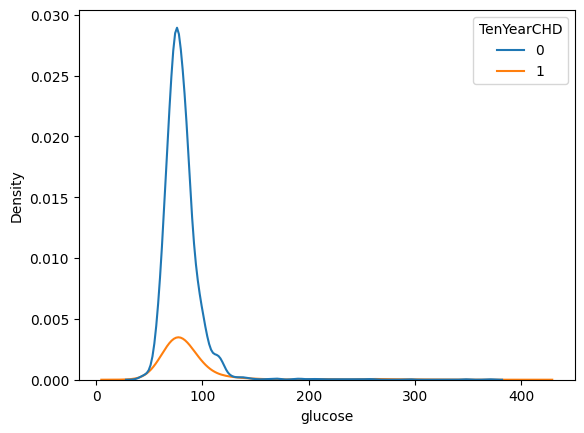

In [33]:
sns.kdeplot(x=df_train['glucose'], hue=df_train['TenYearCHD'])

In [ ]:
# use the arcsign again to try to smooth out the curve & address outliers

In [35]:
df_train["glucose_arc"]=np.arcsinh(df_train["glucose"])

<Axes: ylabel='glucose_arc'>

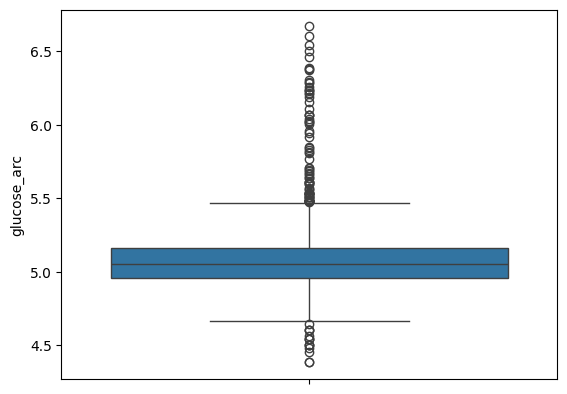

In [36]:
sns.boxplot(df_train["glucose_arc"])
#a bit more evened out but still not really looking great

In [ ]:
#since we're dealing with health data, an outlier might be an important point to include. Maybe really high or low values of glucose are very predictive
#and important to include in our model. Thus, we are not removing outliers but leaving them in.
#maybe we will iterate through regressions with and without outliers to see how it impacts the accurracy of the model

In [ ]:
#looking to see if theres any immediate trends

<Axes: xlabel='glucose_arc', ylabel='sysBP_arc'>

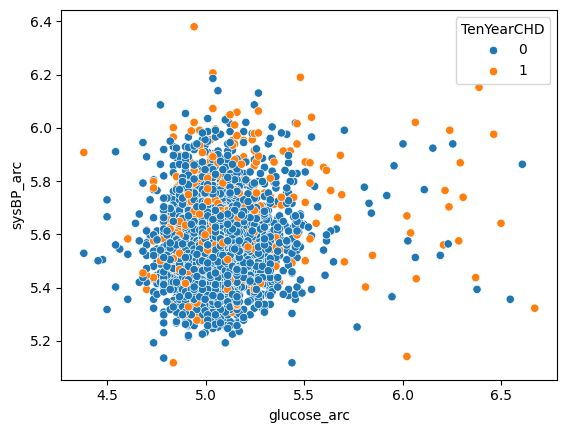

In [37]:
sns.scatterplot(x=df_train['glucose_arc'],y=df_train["sysBP_arc"],hue = df_train['TenYearCHD'])
#looking kind of like a hot mess , with outliers both with and without risk of CHD